In [28]:
import pandas as pd
import numpy as np

In [36]:
df = pd.read_excel('data/실거래가/01_ID있는버전_테스트.xlsx', index_col=0)
df

,시군구,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,거래유형
ID,,,,,,,,,,
서울특별시 강남구 개포동 개포6차우성아파트1동~8동 80,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,80,201801,3,130000,4,1987,언주로 3,-
서울특별시 동작구 신대방동 롯데관악타워 150,서울특별시 동작구 신대방동,롯데관악타워,150,201801,4,74000,27,1996,보라매로5길 51,-
서울특별시 동작구 신대방동 경남교수 80,서울특별시 동작구 신대방동,경남교수,80,201801,25,65000,17,2001,여의대방로10길 14,-
서울특별시 동작구 상도동 힐스테이트 상도 프레스티지 80,서울특별시 동작구 상도동,힐스테이트 상도 프레스티지,80,201801,27,85800,15,2013,상도로 346-2,-
서울특별시 동작구 상도동 힐스테이트 상도 프레스티지 120,서울특별시 동작구 상도동,힐스테이트 상도 프레스티지,120,201801,24,104500,12,2013,상도로 346-2,-
...,...,...,...,...,...,...,...,...,...,...
서울특별시 강남구 삼성동 삼성동힐스테이트 1단지 30,서울특별시 강남구 삼성동,삼성동힐스테이트 1단지,30,202206,20,126000,15,2008,학동로68길 29,중개거래
서울특별시 노원구 공릉동 태강아파트 50,서울특별시 노원구 공릉동,태강아파트,50,202206,26,60000,5,1999,공릉로34길 62,중개거래
서울특별시 노원구 공릉동 태강아파트 60,서울특별시 노원구 공릉동,태강아파트,60,202206,21,70500,4,1999,공릉로34길 62,중개거래


In [37]:
df_f = df[['전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)', '층', '건축년도']]

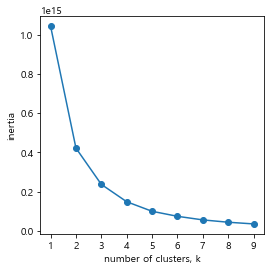

In [38]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_f)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [39]:
clust_model = KMeans(n_clusters = 3 # 클러스터 갯수
#                      , n_init=10 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
#                      , max_iter=500 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
#                      , random_state = 42
#                      , algorithm='auto'
                    )

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(df_f) # unsupervised learning 

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred = clust_model.predict(df_f) # 각 예측군집

print(pd.DataFrame(centers))
print(pred[:10])


            0              1          2              3          4            5
0   67.431616  201931.499336  15.791249   54381.989331   8.555313  2000.068128
1  129.335525  201999.090255  15.899085  286879.545883  11.991205  1998.506263
2   91.087612  201976.460731  15.822751  132942.609766  10.396397  2002.345467
[2 0 0 0 2 0 0 0 0 0]


In [40]:
clust_df = df_f.copy()
clust_df['clust'] = pred
clust_df.head()

,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,clust
ID,,,,,,,
서울특별시 강남구 개포동 개포6차우성아파트1동~8동 80,80,201801,3,130000,4,1987,2
서울특별시 동작구 신대방동 롯데관악타워 150,150,201801,4,74000,27,1996,0
서울특별시 동작구 신대방동 경남교수 80,80,201801,25,65000,17,2001,0
서울특별시 동작구 상도동 힐스테이트 상도 프레스티지 80,80,201801,27,85800,15,2013,0
서울특별시 동작구 상도동 힐스테이트 상도 프레스티지 120,120,201801,24,104500,12,2013,2


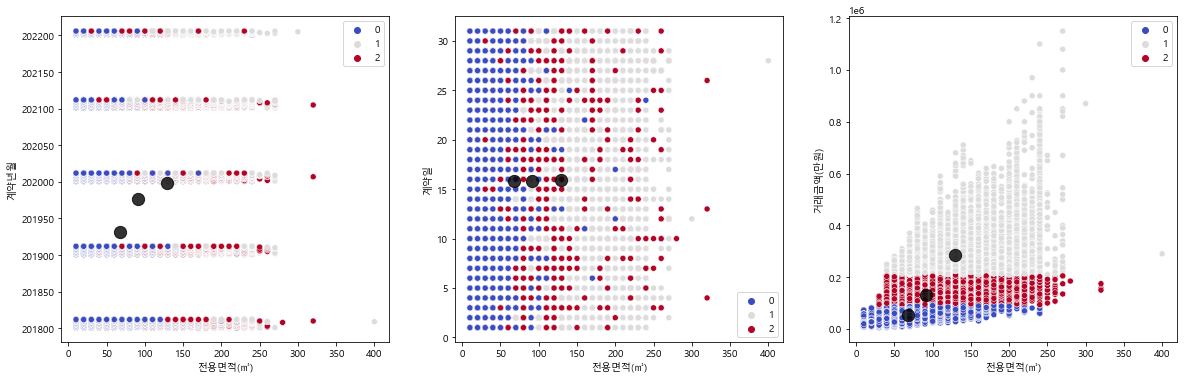

In [41]:
plt.figure(figsize=(20, 6))

X = clust_df

plt.subplot(131)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], data=df_f, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,1], c='black', alpha=0.8, s=150)

plt.subplot(132)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,2], data=df_f, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150)

plt.subplot(133)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,3], data=df_f, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,3], c='black', alpha=0.8, s=150)

plt.show()

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
scaled_df = pd.DataFrame(standard_scaler.fit_transform(df_f.iloc[:,0:4]), columns=df_f.iloc[:,0:4].columns)

In [43]:
clust_model.fit(scaled_df) # unsupervised learning #애초에 결과를 모르기 때문에 data만 넣어주면 됨

centers_s = clust_model.cluster_centers_
pred_s = clust_model.predict(scaled_df)

In [44]:
clust_df['clust_s'] = pred_s
clust_df

,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,clust,clust_s
ID,,,,,,,,
서울특별시 강남구 개포동 개포6차우성아파트1동~8동 80,80,201801,3,130000,4,1987,2,2
서울특별시 동작구 신대방동 롯데관악타워 150,150,201801,4,74000,27,1996,0,0
서울특별시 동작구 신대방동 경남교수 80,80,201801,25,65000,17,2001,0,2
서울특별시 동작구 상도동 힐스테이트 상도 프레스티지 80,80,201801,27,85800,15,2013,0,2
서울특별시 동작구 상도동 힐스테이트 상도 프레스티지 120,120,201801,24,104500,12,2013,2,2
...,...,...,...,...,...,...,...,...
서울특별시 강남구 삼성동 삼성동힐스테이트 1단지 30,30,202206,20,126000,15,2008,2,1
서울특별시 노원구 공릉동 태강아파트 50,50,202206,26,60000,5,1999,0,1
서울특별시 노원구 공릉동 태강아파트 60,60,202206,21,70500,4,1999,0,1


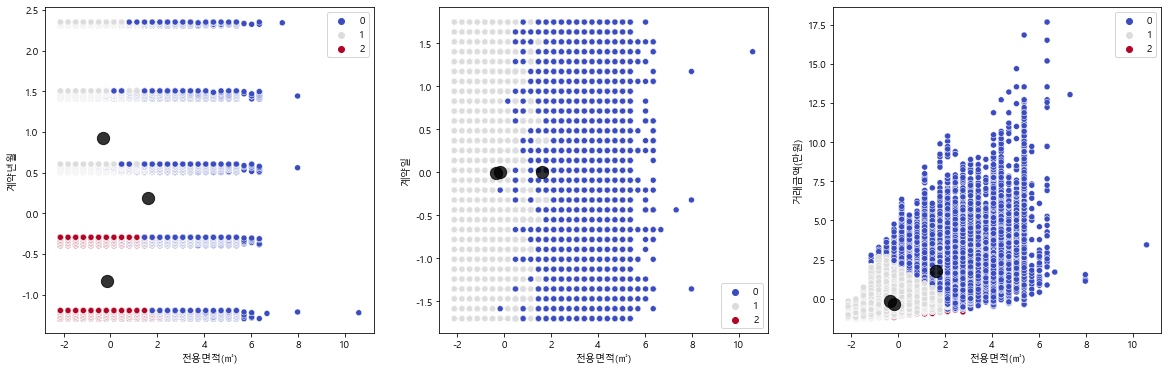

In [45]:
plt.figure(figsize=(20, 6))

X = scaled_df

plt.subplot(131)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], data=scaled_df, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers_s[:,0], centers_s[:,1], c='black', alpha=0.8, s=150)

plt.subplot(132)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,2], data=scaled_df, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers_s[:,0], centers_s[:,2], c='black', alpha=0.8, s=150)

plt.subplot(133)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,3], data=scaled_df, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers_s[:,0], centers_s[:,3], c='black', alpha=0.8, s=150)

plt.show()